7 Days of Codes

Desafio: Dia 5

Vitor Kawasaki

#Importando Bibliotecas

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Carregando Dataset

In [2]:
df = pd.read_csv('desafio_dia2.csv', sep=';', encoding='ISO-8859-1')

#Verificação das Colunas (variáveis)

In [3]:
df.columns

Index(['id_emprestimo', 'codigo_barras', 'data_renovacao', 'horario_renovacao',
       'data_emprestimo', 'horario_emprestimo', 'data_devolucao',
       'horario_devolucao', 'matricula_ou_siape', 'tipo_vinculo_usuario',
       'id_exemplar', 'colecao', 'biblioteca', 'status_material',
       'localizacao', 'ano_emprestimo', 'tema'],
      dtype='object')

#Verificação do DataFrame

In [6]:
df.head()

,id_emprestimo,codigo_barras,data_renovacao,horario_renovacao,data_emprestimo,horario_emprestimo,data_devolucao,horario_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,ano_emprestimo,tema
0,2962509,2007005628,1970-01-01,00:00,2020-01-02,08:17,2020-01-07,11:14,20181028903,ALUNO_POS_GRADUACAO,216276,Acervo Circulante,BIBLIOTECA CENTRAL ZILA MAMEDE,REGULAR,640,2020,Ciencias aplicadas
1,2962511,2012008328,1970-01-01,00:00,2020-01-02,08:17,2020-01-07,11:24,20181028903,ALUNO_POS_GRADUACAO,971301,Acervo Circulante,BIBLIOTECA CENTRAL ZILA MAMEDE,REGULAR,350,2020,Ciencias sociais
2,2962512,2012055016,2020-01-17,09:56,2020-01-02,08:36,2020-01-31,14:53,20190153535,ALUNO_GRADUACAO,1019380,Acervo Circulante,BIBLIOTECA CENTRAL ZILA MAMEDE,REGULAR,696,2020,Ciencias aplicadas
3,2962513,L197391,2020-01-17,23:50,2020-01-02,09:36,2020-01-24,08:18,20180051611,ALUNO_GRADUACAO,177552,Acervo Circulante,BIBLIOTECA CENTRAL ZILA MAMEDE,REGULAR,699,2020,Ciencias aplicadas
4,2962514,2016030245,2020-01-17,23:50,2020-01-02,09:36,2020-01-24,08:18,20180051611,ALUNO_GRADUACAO,1243242,Acervo Circulante,BIBLIOTECA CENTRAL ZILA MAMEDE,REGULAR,508,2020,Matematica e ciencias naturais


# Criando coluna data_emprestimo

In [7]:
# Convertendo a coluna 'data_emprestimo' para o tipo datetime, caso ainda não esteja
df['data_emprestimo'] = pd.to_datetime(df['data_emprestimo'])

# Criando a coluna 'mes_emprestimo' contendo apenas o mês extraído da coluna 'data_emprestimo'
df['mes_emprestimo'] = df['data_emprestimo'].dt.month


In [8]:
df.sample(5)

,id_emprestimo,codigo_barras,data_renovacao,horario_renovacao,data_emprestimo,horario_emprestimo,data_devolucao,horario_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,ano_emprestimo,tema,mes_emprestimo
89408,2712328,2018001677,1970-01-01,00:00,2018-08-16,19:29,2018-10-02,17:27,20181010589,ALUNO_POS_GRADUACAO,1290021,Acervo Circulante,BIBLIOTECA CENTRAL ZILA MAMEDE,REGULAR,331,2018,Ciencias sociais,8
208916,1519369,2011071924,2013-06-30,11:13,2013-05-31,14:19,2013-07-30,10:24,2011107063,ALUNO_POS_GRADUACAO,1048657,Acervo Circulante,BIBLIOTECA SETORIAL PROF. RONALDO XAVIER DE AR...,REGULAR,346,2013,Ciencias sociais,5
28318,2889903,2014035298,1970-01-01,00:00,2019-07-29,16:29,2019-08-15,18:39,20160101037,ALUNO_GRADUACAO,1145288,Acervo Circulante,BIBLIOTECA CENTRAL ZILA MAMEDE,REGULAR,247,2019,Religiao,7
154917,2316623,2010048858,1970-01-01,00:00,2016-10-10,19:19,2016-11-09,14:46,2016033481,ALUNO_GRADUACAO,802143,Acervo Circulante,BIBLIOTECA CENTRAL ZILA MAMEDE,REGULAR,627,2016,Ciencias aplicadas,10
38785,2910295,2012006358,1970-01-01,00:00,2019-08-27,15:31,2019-09-11,11:28,20170053470,ALUNO_GRADUACAO,972785,Acervo Circulante,BIBLIOTECA CENTRAL ZILA MAMEDE,REGULAR,344,2019,Ciencias sociais,8


# Gráfico Boxplot

In [32]:
df_graduacao = []
df_pos_graduacao = []

# Filtrando apenas os anos de 2010 a 2020
df = df[(df['ano_emprestimo'] >= 2010) & (df['ano_emprestimo'] <= 2020)]

# Identificando a coleção com a maior frequência de empréstimos
colecao_mais_frequente = df['colecao'].mode()[0]

# Filtrando os dados apenas para a coleção mais frequente
df_colecao_mais_frequente = df[df['colecao'] == colecao_mais_frequente]

# Filtrando apenas alunos de graduação e pós-graduação
df_graduacao = df[df['tipo_vinculo_usuario'] == 'ALUNO_GRADUACAO']
df_pos_graduacao = df[df['tipo_vinculo_usuario'] == 'ALUNO_POS_GRADUACAO']

<ipython-input-33-064e39388f00>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ano_emprestimo', y='mes_emprestimo', data=df_graduacao, palette='Set3')
<ipython-input-33-064e39388f00>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ano_emprestimo', y='mes_emprestimo', data=df_pos_graduacao, palette='Set3')


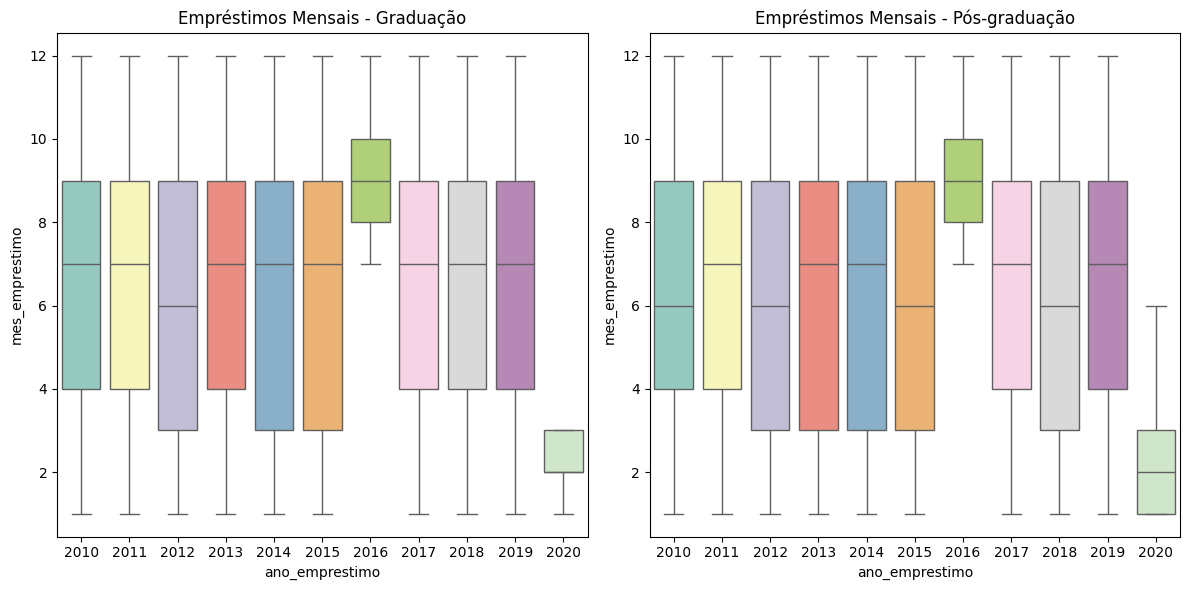

In [33]:
# Plotando gráficos de boxplot para cada tipo de usuário
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='ano_emprestimo', y='mes_emprestimo', data=df_graduacao, palette='Set3')
plt.title('Empréstimos Mensais - Graduação')

plt.subplot(1, 2, 2)
sns.boxplot(x='ano_emprestimo', y='mes_emprestimo', data=df_pos_graduacao, palette='Set3')
plt.title('Empréstimos Mensais - Pós-graduação')

plt.tight_layout()
plt.show()

# Imagem explicativa do boxplot

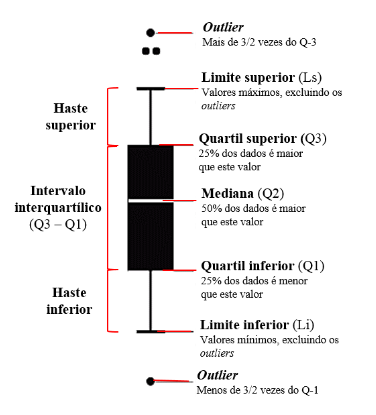

In [34]:
print("Número de empréstimos para graduandos:", len(df_graduacao))
print("Número de empréstimos para pós-graduandos:", len(df_pos_graduacao))

Número de empréstimos para graduandos: 156742
Número de empréstimos para pós-graduandos: 50928
